In [3]:
import pandas as pd

# Load the Titanic training and testing datasets
train_df = pd.read_csv("/content/Titanic_train.csv")
test_df = pd.read_csv("/content/Titanic_test.csv")

# Show basic information about the training dataset
train_info = train_df.info()
train_head = train_df.head()
train_description = train_df.describe(include='all')

train_info, train_head, train_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

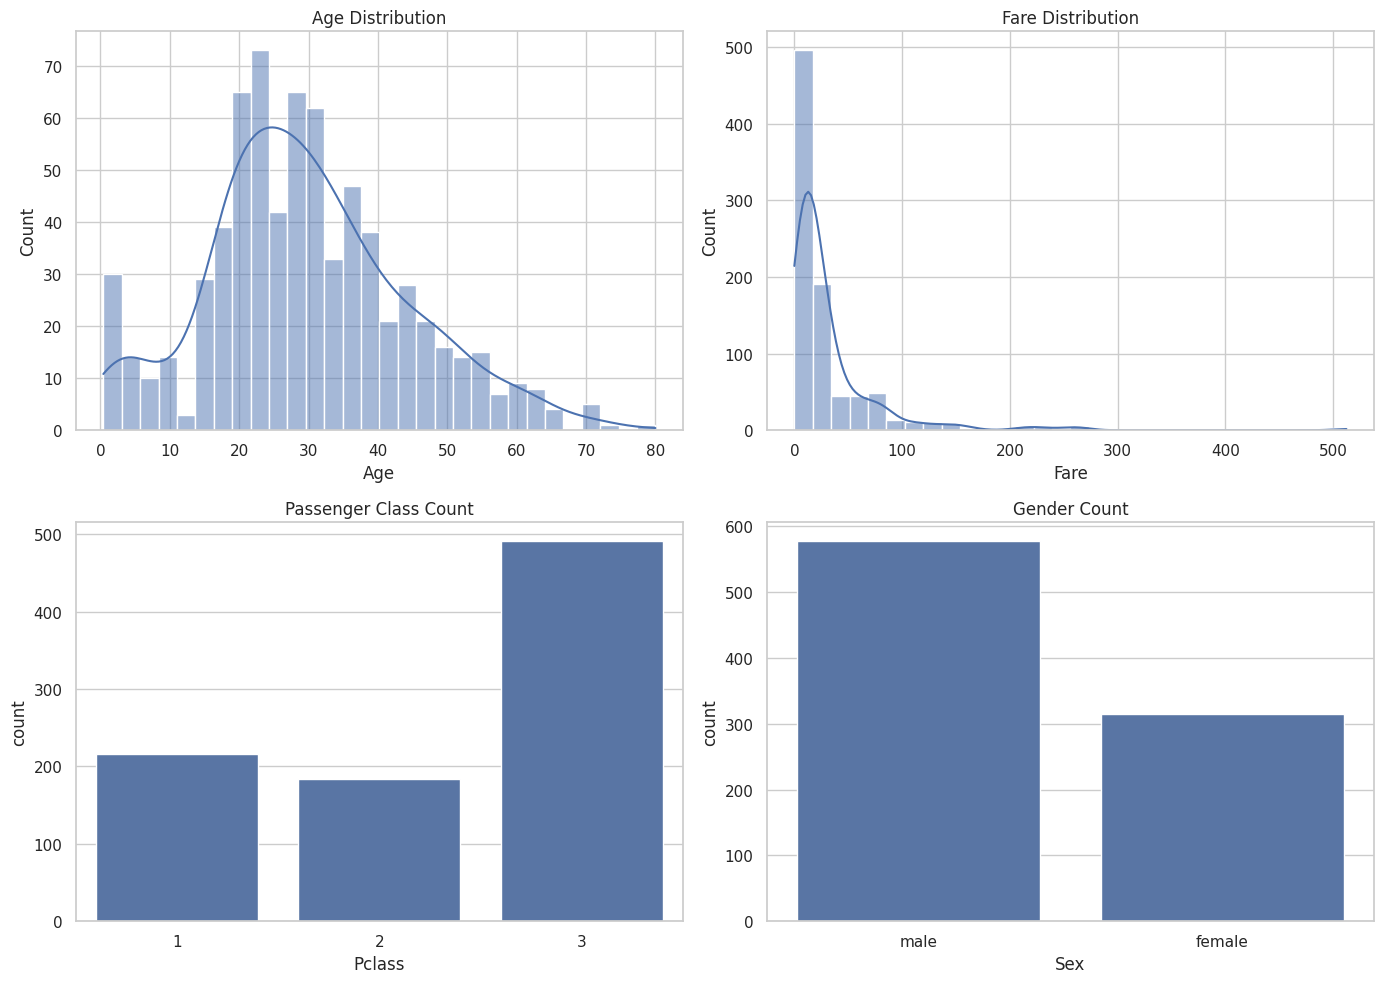

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Plot histogram of numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(train_df['Fare'], kde=True, bins=30, ax=axes[0, 1]).set_title('Fare Distribution')
sns.countplot(data=train_df, x='Pclass', ax=axes[1, 0]).set_title('Passenger Class Count')
sns.countplot(data=train_df, x='Sex', ax=axes[1, 1]).set_title('Gender Count')
plt.tight_layout()
plt.show()


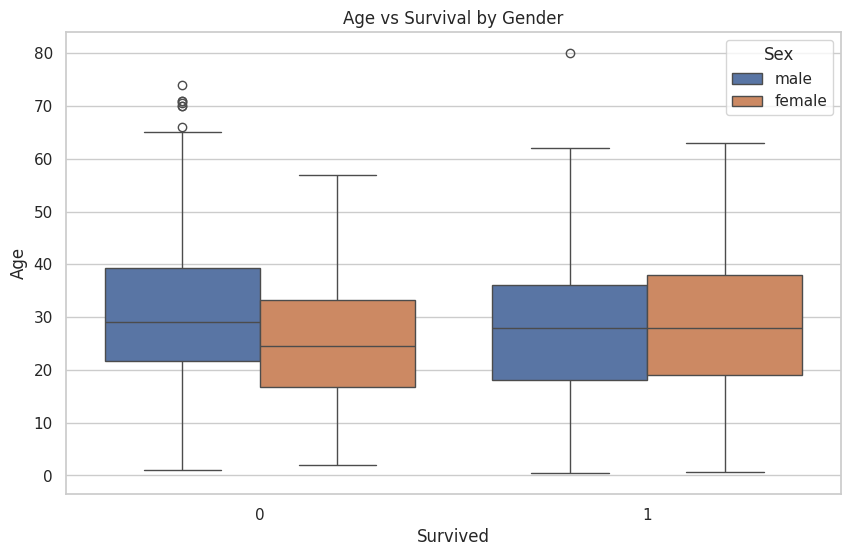

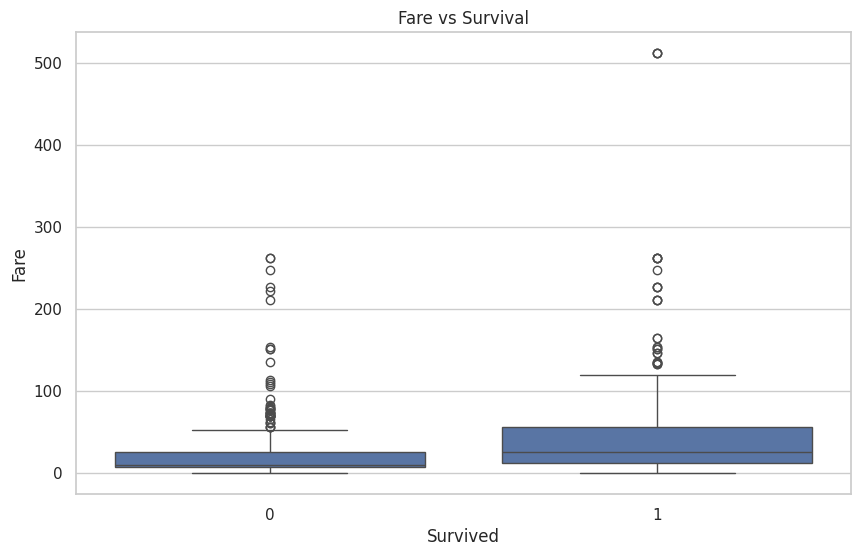

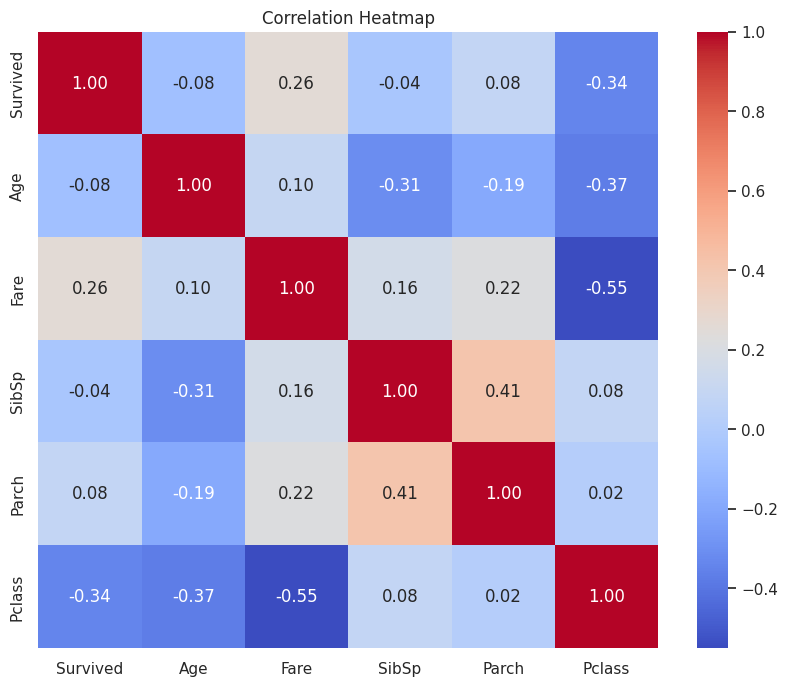

In [5]:
# Create box plots and pair plots to further explore relationships

# Box plot of Age vs Survived by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Survived', y='Age', hue='Sex')
plt.title('Age vs Survival by Gender')
plt.show()

# Box plot of Fare vs Survived
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x='Survived', y='Fare')
plt.title('Fare vs Survival')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
corr = train_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
import pandas as pd

# Load the Titanic dataset (train)
df = pd.read_csv('Titanic_train.csv')

# Check missing values
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'dtype': df.dtypes.astype(str),
    'Missing': df.isna().sum(),
    '% Missing': (df.isna().sum() / len(df) * 100).round(1)
})

# Strategy for each column
def imputation_strategy(row):
    if row['Column'] in ['PassengerId', 'Name', 'Ticket']:
        return 'Drop (identifier/text)'
    elif row['Column'] == 'Cabin':
        return 'Drop (too many missing)'
    elif row['dtype'].startswith(('float', 'int')):
        return 'Impute with median'
    else:
        return 'Impute with most frequent'

missing_summary['Strategy'] = missing_summary.apply(imputation_strategy, axis=1)

# Print or view the result
print(missing_summary)




                  Column    dtype  Missing  % Missing  \
PassengerId  PassengerId    int64        0        0.0   
Survived        Survived    int64        0        0.0   
Pclass            Pclass    int64        0        0.0   
Name                Name   object        0        0.0   
Sex                  Sex   object        0        0.0   
Age                  Age  float64      177       19.9   
SibSp              SibSp    int64        0        0.0   
Parch              Parch    int64        0        0.0   
Ticket            Ticket   object        0        0.0   
Fare                Fare  float64        0        0.0   
Cabin              Cabin   object      687       77.1   
Embarked        Embarked   object        2        0.2   

                              Strategy  
PassengerId     Drop (identifier/text)  
Survived            Impute with median  
Pclass              Impute with median  
Name            Drop (identifier/text)  
Sex          Impute with most frequent  
Age         

Accuracy : 0.8100558659217877
Precision: 0.7397260273972602
Recall   : 0.782608695652174
F1-score : 0.7605633802816901
ROC-AUC  : 0.8462450592885375


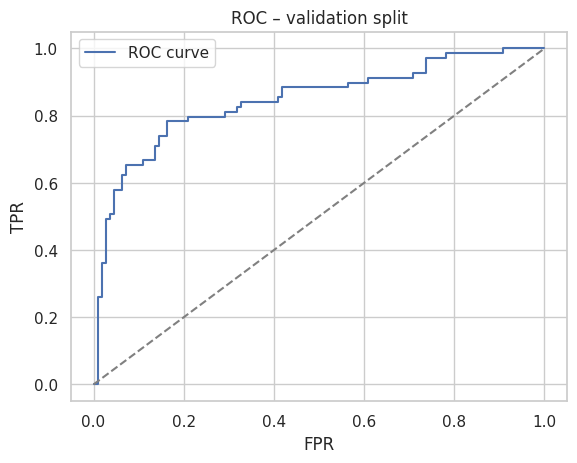

In [12]:
# ------------------------------------------
# TRAIN / VALIDATION SPLIT  (no external labels)
# ------------------------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)
import matplotlib.pyplot as plt

# 1. Load the labelled training data
df = pd.read_csv('/content/Titanic_train.csv')

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
X = df.drop(columns=['Survived', *drop_cols])
y = df['Survived']

# 2. Identify column groups
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median'))])
cat_pipe = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                     ('ohe', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('prep', preprocessor),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# 3. 80-20 hold-out split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

# 4. Metrics
y_pred  = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]

print('Accuracy :', accuracy_score(y_val, y_pred))
print('Precision:', precision_score(y_val, y_pred))
print('Recall   :', recall_score(y_val, y_pred))
print('F1-score :', f1_score(y_val, y_pred))
print('ROC-AUC  :', roc_auc_score(y_val, y_proba))

# 5. ROC curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0,1],[0,1],'--', color='grey')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC – validation split')
plt.legend(); plt.show()




scikit-learn version: 1.6.1


,Feature,Coefficient
0,Fare,+0.003
1,Age,-0.036
2,Embarked_Q,-0.067
3,Parch,-0.091
4,SibSp,-0.313
5,Embarked_S,-0.431
6,Pclass_2,-0.724
7,Pclass_3,-1.909
8,Sex_male,-2.589


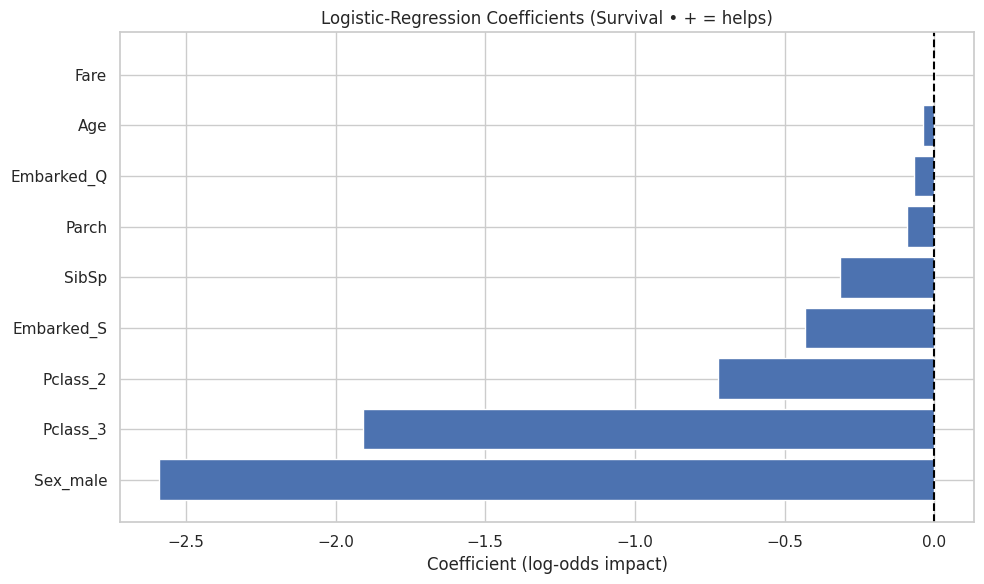


Top positive factors that INCREASE survival probability:
   Feature  Coefficient
      Fare     0.003376
       Age    -0.035979
Embarked_Q    -0.067486
     Parch    -0.091125
     SibSp    -0.313310

Top negative factors that DECREASE survival probability:
   Feature  Coefficient
  Sex_male    -2.588921
  Pclass_3    -1.909431
  Pclass_2    -0.723585
Embarked_S    -0.430608
     SibSp    -0.313310


In [14]:
# -----------------------------------------------------------
# TITANIC – LOGISTIC-REGRESSION COEFFICIENT INTERPRETATION
# -----------------------------------------------------------
# 0.  Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import sklearn

print("scikit-learn version:", sklearn.__version__)

# 1.  Load the labelled Titanic training data  (adjust path if needed)
df = pd.read_csv('/content/Titanic_train.csv')   # <-- ensure file is in Colab /content

# 2.  Drop ID-like / free-text / sparse columns
drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
X = df.drop(columns=['Survived', *drop_cols])
y = df['Survived']

# 3.  Define column groups
num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']        # treat Pclass as categorical

# 4.  Build preprocessing sub-pipelines
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# --- Handle OneHotEncoder keyword change across scikit-learn versions
if sklearn.__version__ >= '1.2':
    encoder = OneHotEncoder(drop='first', sparse_output=False)
else:
    encoder = OneHotEncoder(drop='first', sparse=False)

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', encoder)
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

# 5.  Full model pipeline
model = Pipeline([
    ('prep', preprocessor),
    ('clf',  LogisticRegression(max_iter=1000))
])

# 6.  Fit on the entire labelled set
model.fit(X, y)

# 7.  Get feature names after OHE
ohe       = model.named_steps['prep'].named_transformers_['cat'].named_steps['encoder']
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = num_cols + list(cat_names)

# 8.  Collect coefficients
coefs = model.named_steps['clf'].coef_[0]
coef_df = (
    pd.DataFrame({'Feature': feature_names, 'Coefficient': coefs})
      .sort_values('Coefficient', ascending=False)
      .reset_index(drop=True)
)

# 9.  Display in notebook
display(coef_df.style.format({'Coefficient': '{:+.3f}'}))

# 10.  Bar-plot of effects
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.axvline(0, color='black', linestyle='--')
plt.title('Logistic-Regression Coefficients (Survival • + = helps)')
plt.xlabel('Coefficient (log-odds impact)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 11.  Quick textual takeaway
print("\nTop positive factors that INCREASE survival probability:")
print(coef_df.head(5).to_string(index=False))

print("\nTop negative factors that DECREASE survival probability:")
print(coef_df.tail(5).sort_values('Coefficient').to_string(index=False))


In [19]:
# ⬇️ Notice the exclamation mark — this is a shell command, not Python
!pip install -q pandas scikit-learn joblib streamlit pyngrok


In [20]:
# train_and_save.py logic inside the notebook
import pandas as pd, joblib, sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

print("scikit-learn version:", sklearn.__version__)

# 1. Load data (upload Titanic_train.csv to /content first)
df = pd.read_csv('/content/Titanic_train.csv')

drop_cols = ['PassengerId', 'Name', 'Ticket', 'Cabin']
X = df.drop(columns=['Survived', *drop_cols])
y = df['Survived']

num_cols = ['Age', 'SibSp', 'Parch', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

num_pipe = Pipeline([('imputer', SimpleImputer(strategy='median'))])

enc_args = {'drop': 'first'}
enc_args['sparse_output' if sklearn.__version__ >= '1.2' else 'sparse'] = False
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(**enc_args))
])

preproc = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

model = Pipeline([
    ('prep', preproc),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

model.fit(X, y)
joblib.dump(model, '/content/titanic_logreg.pkl')
print("✅ Model saved to /content/titanic_logreg.pkl")


scikit-learn version: 1.6.1
✅ Model saved to /content/titanic_logreg.pkl


In [21]:
%%writefile /content/app.py
import streamlit as st, joblib, pandas as pd

model = joblib.load('/content/titanic_logreg.pkl')

st.set_page_config(page_title='🚢 Titanic Survival Predictor', layout='centered')
st.title('🚢 Titanic Survival Predictor')

with st.form('form'):
    col1, col2 = st.columns(2)
    with col1:
        pclass = st.selectbox('Passenger Class', [1,2,3])
        sex    = st.selectbox('Sex', ['male','female'])
        age    = st.slider('Age', 0.42, 80.0, 29.0)
        sibsp  = st.number_input('Siblings/Spouses aboard', 0, 8, 0)
    with col2:
        parch  = st.number_input('Parents/Children aboard', 0, 6, 0)
        fare   = st.slider('Fare (£)', 0.0, 520.0, 32.2)
        embarked = st.selectbox('Embarked', ['S','C','Q'])
    submitted = st.form_submit_button('Predict')

if submitted:
    X = pd.DataFrame([{
        'Pclass': pclass, 'Sex': sex, 'Age': age, 'SibSp': sibsp,
        'Parch': parch,  'Fare': fare, 'Embarked': embarked
    }])
    prob = model.predict_proba(X)[0,1]
    pred = model.predict(X)[0]
    st.subheader('Result')
    st.write(f'**Survival Probability:** {prob:.1%}')
    st.write('**Prediction:** ' + ('✅ Survived' if pred else '❌ Did not survive'))



Writing /content/app.py


In [ ]:
from pyngrok import ngrok, conf
conf.get_default().region = 'us'   # choose if EU/Asia endpoints are blocked
!ngrok config add-authtoken 2z35MUDZGlckPHn1zQyeU8QSir4_7FwLQdU8pbG2F2gztebz9
public_url = ngrok.connect(8501)
print("🌐  Open this URL in a new tab:", public_url)

# start Streamlit (runs in the background, logs shown)
!streamlit run /content/app.py --server.headless true --server.port 8501 &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐  Open this URL in a new tab: NgrokTunnel: "https://11d1-35-185-56-138.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.185.56.138:8501

